# https://www.datacamp.com/tutorial/k-means-clustering-python

In [ ]:
import pandas as pd

home_data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


## Visualize the Data

<Axes: xlabel='longitude', ylabel='latitude'>

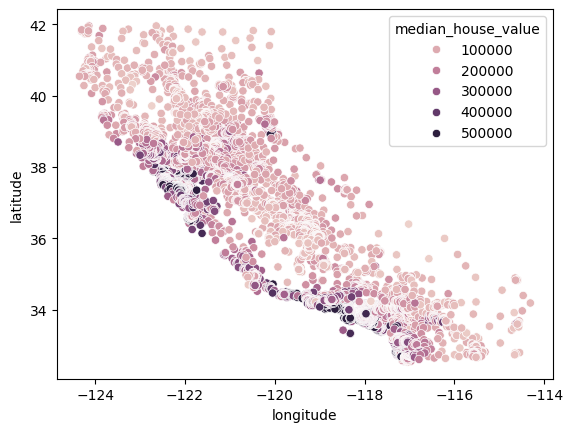

In [2]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

## Normalizing the Data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [4]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

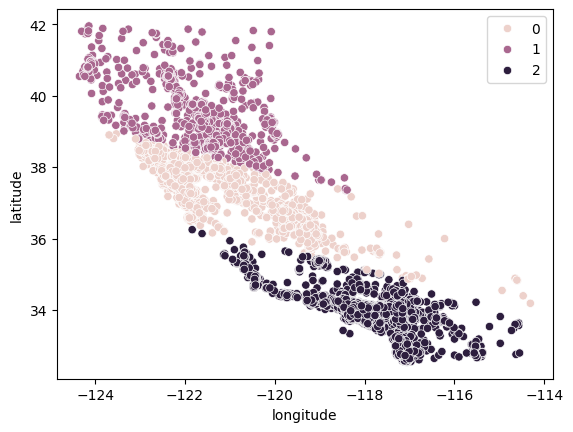

In [7]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

<Axes: ylabel='median_house_value'>

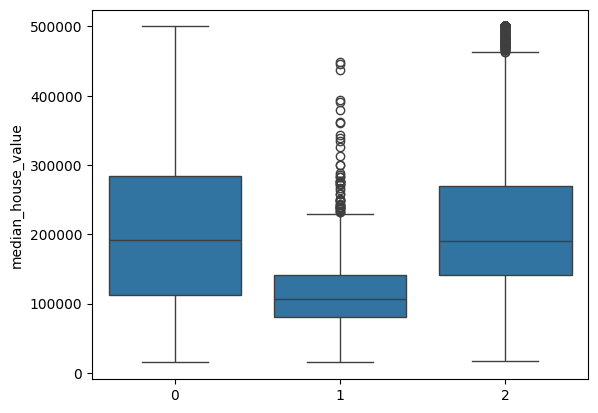

In [8]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

In [9]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

np.float64(0.7499371920703546)

## Elbow Method for Optimal K

In [ ]:
# Elbow method - plot inertia (within-cluster sum of squares)
inertias = []
K_range = range(2, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=0, n_init='auto')
    model.fit(X_train_norm)
    inertias.append(model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

## Davies-Bouldin Index (Lower is Better)

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Calculate multiple metrics for different k values
db_scores = []
ch_scores = []
sil_scores = []

for k in K_range:
    model = KMeans(n_clusters=k, random_state=0, n_init='auto')
    labels = model.fit_predict(X_train_norm)
    
    db_scores.append(davies_bouldin_score(X_train_norm, labels))
    ch_scores.append(calinski_harabasz_score(X_train_norm, labels))
    sil_scores.append(silhouette_score(X_train_norm, labels, metric='euclidean'))

# Plot all metrics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Davies-Bouldin Index (lower is better)
ax1.plot(K_range, db_scores, 'ro-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Davies-Bouldin Index')
ax1.set_title('Davies-Bouldin Index (Lower is Better)')
ax1.grid(True)

# Calinski-Harabasz Index (higher is better)
ax2.plot(K_range, ch_scores, 'go-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Calinski-Harabasz Index')
ax2.set_title('Calinski-Harabasz Index (Higher is Better)')
ax2.grid(True)

# Silhouette Score (higher is better)
ax3.plot(K_range, sil_scores, 'bo-')
ax3.set_xlabel('Number of Clusters (k)')
ax3.set_ylabel('Silhouette Score')
ax3.set_title('Silhouette Score (Higher is Better)')
ax3.grid(True)

plt.tight_layout()
plt.show()

# Print best k for each metric
best_k_db = K_range[np.argmin(db_scores)]
best_k_ch = K_range[np.argmax(ch_scores)]
best_k_sil = K_range[np.argmax(sil_scores)]

print(f"Best k according to Davies-Bouldin Index: {best_k_db}")
print(f"Best k according to Calinski-Harabasz Index: {best_k_ch}")
print(f"Best k according to Silhouette Score: {best_k_sil}")

In [10]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: >

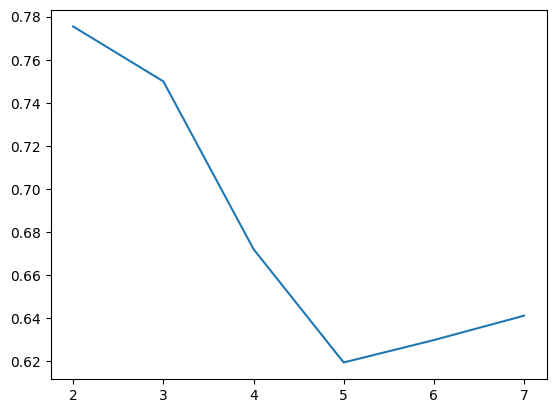

In [12]:
sns.lineplot(x = K, y = score)

<Axes: xlabel='longitude', ylabel='latitude'>

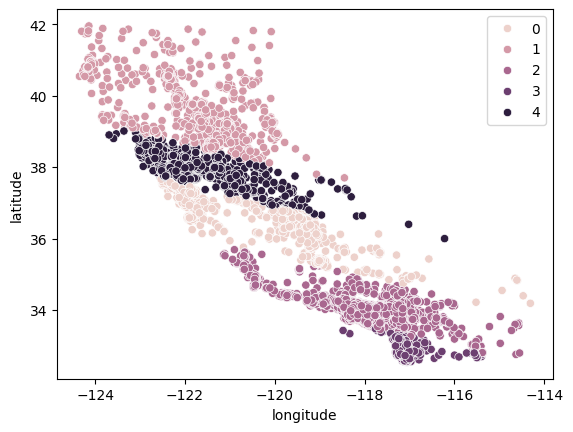

In [13]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

<Axes: ylabel='median_house_value'>

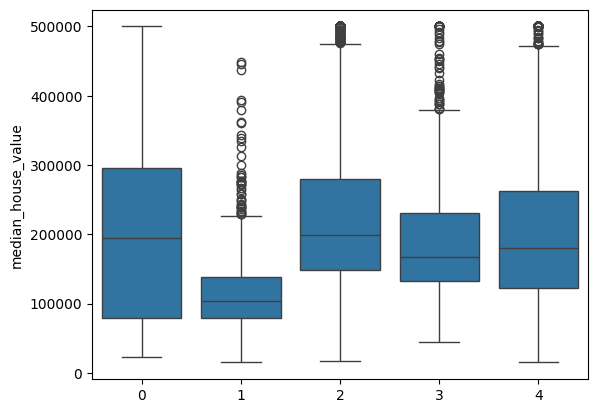

In [15]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])

# k-medoids

In [27]:
pip install pyclustering


Note: you may need to restart the kernel to use updated packages.


In [28]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
from sklearn.metrics import silhouette_score
import numpy as np


In [29]:
X_train_norm = preprocessing.normalize(X_train)


In [30]:
data = X_train_norm.tolist()


In [31]:
def run_kmedoids(data, k):
    # Initial medoids = indices aléatoires
    initial_medoids = np.random.choice(len(data), k, replace=False).tolist()
    
    # Construire le modèle
    kmed = kmedoids(data, initial_medoids, data_type='points')
    
    # Entraîner
    kmed.process()
    
    clusters = kmed.get_clusters()           # index des points dans chaque cluster
    medoids = kmed.get_medoids()             # indices des medoids
    
    # Convert clusters to labels
    labels = np.zeros(len(data), dtype=int)
    for idx, cluster in enumerate(clusters):
        for point_index in cluster:
            labels[point_index] = idx
            
    return labels, clusters, medoids


In [32]:
labels_km3, clusters_km3, medoids_km3 = run_kmedoids(data, 3)


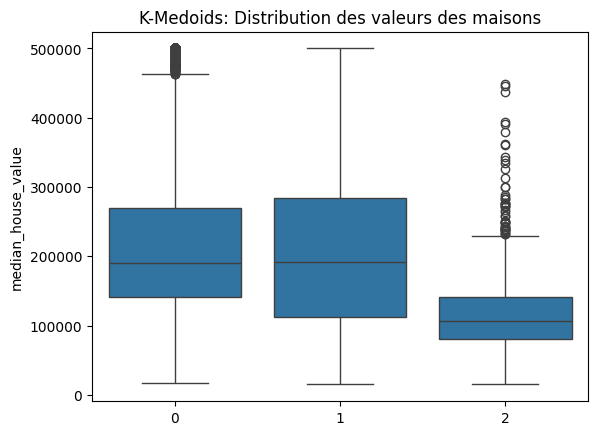

In [33]:
sns.boxplot(x=labels_km3, y=y_train['median_house_value'])
plt.title("K-Medoids: Distribution des valeurs des maisons")
plt.show()


In [34]:
silhouette_score(data, labels_km3, metric='euclidean')


np.float64(0.7499956340585485)

In [35]:
K = range(2, 8)
sil_scores = []

for k in K:
    labels, _, _ = run_kmedoids(data, k)
    sil = silhouette_score(data, labels, metric='euclidean')
    sil_scores.append(sil)


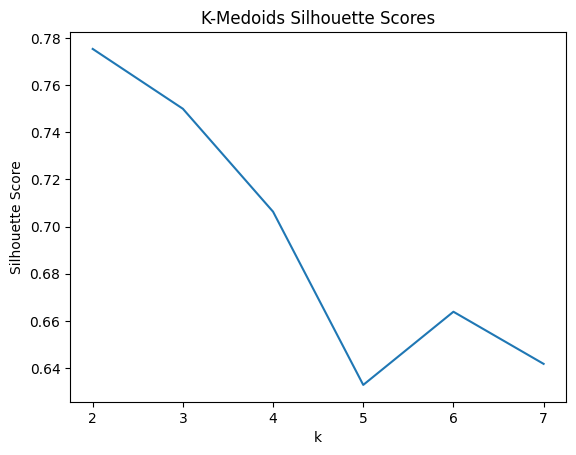

In [36]:
from matplotlib import pyplot as plt
sns.lineplot(x=K, y=sil_scores)
plt.title("K-Medoids Silhouette Scores")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()


In [37]:
k_best = 5
labels_km5, clusters_km5, medoids_km5 = run_kmedoids(data, k_best)


In [38]:
df_train = X_train.copy()
df_train['median_house_value'] = y_train.values
df_train['KMedoids_Cluster'] = labels_km5


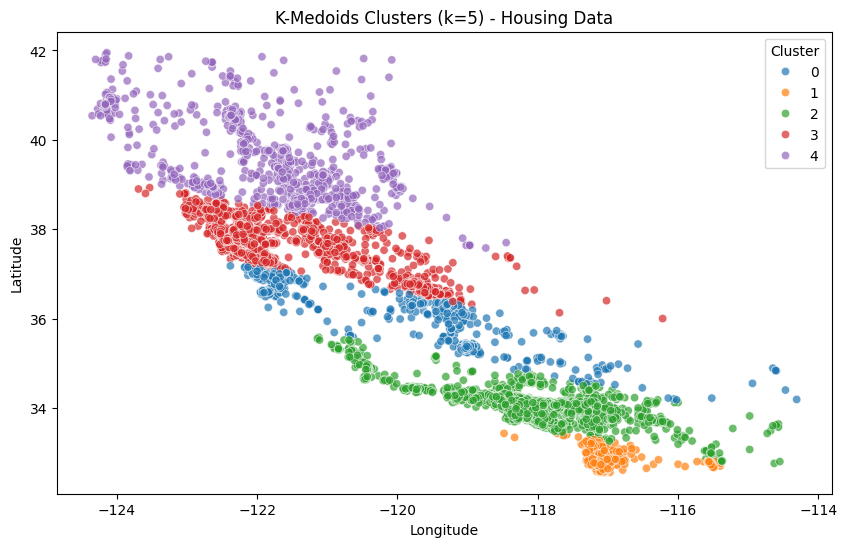

In [39]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_train,
    x='longitude',
    y='latitude',
    hue='KMedoids_Cluster',
    palette='tab10',
    alpha=0.7
)

plt.title("K-Medoids Clusters (k=5) - Housing Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()


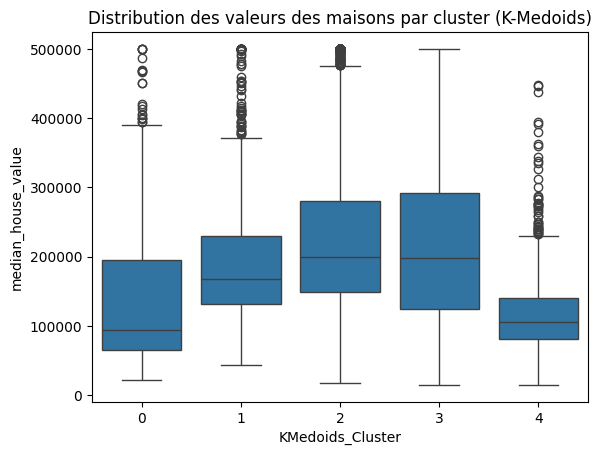

In [40]:
sns.boxplot(x='KMedoids_Cluster', y='median_house_value', data=df_train)
plt.title("Distribution des valeurs des maisons par cluster (K-Medoids)")
plt.show()


## Alternative Clustering Algorithms

In [ ]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt

# DBSCAN - Density-based clustering
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train_norm)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X_train_norm)

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# K-Means with best k
best_kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto')
kmeans_labels = best_kmeans.fit_predict(X_train_norm)

# Plot 1: K-Means
axes[0, 0].scatter(X_train['longitude'], X_train['latitude'], c=kmeans_labels, cmap='tab10', alpha=0.6)
axes[0, 0].set_title(f'K-Means Clustering (k=5)')
axes[0, 0].set_xlabel('Longitude')
axes[0, 0].set_ylabel('Latitude')

# Plot 2: K-Medoids (from previous analysis)
axes[0, 1].scatter(X_train['longitude'], X_train['latitude'], c=labels_km5, cmap='tab10', alpha=0.6)
axes[0, 1].set_title('K-Medoids Clustering (k=5)')
axes[0, 1].set_xlabel('Longitude')
axes[0, 1].set_ylabel('Latitude')

# Plot 3: DBSCAN
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
axes[1, 0].scatter(X_train['longitude'], X_train['latitude'], c=dbscan_labels, cmap='tab10', alpha=0.6)
axes[1, 0].set_title(f'DBSCAN Clustering ({n_clusters_dbscan} clusters found)')
axes[1, 0].set_xlabel('Longitude')
axes[1, 0].set_ylabel('Latitude')

# Plot 4: Hierarchical
axes[1, 1].scatter(X_train['longitude'], X_train['latitude'], c=hierarchical_labels, cmap='tab10', alpha=0.6)
axes[1, 1].set_title('Hierarchical Clustering (k=5)')
axes[1, 1].set_xlabel('Longitude')
axes[1, 1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

# Compare metrics for all algorithms
print("\n" + "="*70)
print("CLUSTERING ALGORITHM COMPARISON")
print("="*70)

algorithms = [
    ('K-Means', kmeans_labels),
    ('K-Medoids', labels_km5),
    ('DBSCAN', dbscan_labels),
    ('Hierarchical', hierarchical_labels)
]

for name, labels in algorithms:
    if len(set(labels)) > 1 and -1 not in set(labels):  # Skip if only noise or single cluster
        sil = silhouette_score(X_train_norm, labels, metric='euclidean')
        db = davies_bouldin_score(X_train_norm, labels)
        ch = calinski_harabasz_score(X_train_norm, labels)
        n_clusters = len(set(labels))
        print(f"{name:20s} | Clusters: {n_clusters:2d} | Silhouette: {sil:.4f} | DB Index: {db:.4f} | CH Index: {ch:.2f}")
    else:
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print(f"{name:20s} | Clusters: {n_clusters:2d} | Noise points: {n_noise}")